In [15]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 

X_trans = X.copy()
  

In [16]:
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Male': 1, 'Female': 0, 'yes': 1, 'no': 0}

for col in binary_columns:
    X_trans[col] = X_trans[col].map(binary_mapping)


ordinal_columns = ['CAEC', 'CALC']
ordinal_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

for col in ordinal_columns:
    X_trans[col] = X_trans[col].map(ordinal_mapping)


merge_encoded = pd.get_dummies(X_trans, columns=['MTRANS'], drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(merge_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9479905437352246
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.86      0.87        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced upper limit for efficiency
    'max_depth': [10, 20, None],     # None allows fully grown trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with None
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,       # Use all available cores for faster execution
    verbose=2        # Increase verbosity for tracking progress
)

# Fit the model
grid_search.fit(X_train, y_train.values.ravel())

# Output best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [28]:
rf_model_2 = grid_search.best_estimator_.fit(X_train, y_train.values.ravel())

y_pred_2 = rf_model_2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9479905437352246
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.86      0.87        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [58]:
feature_importance_df = pd.DataFrame({
    "Feature": merge_encoded.columns,
    "Importance": rf_model_2.feature_importances_
})


In [64]:
sorted_col = feature_importance_df.sort_values('Importance', ascending=False).head(8)

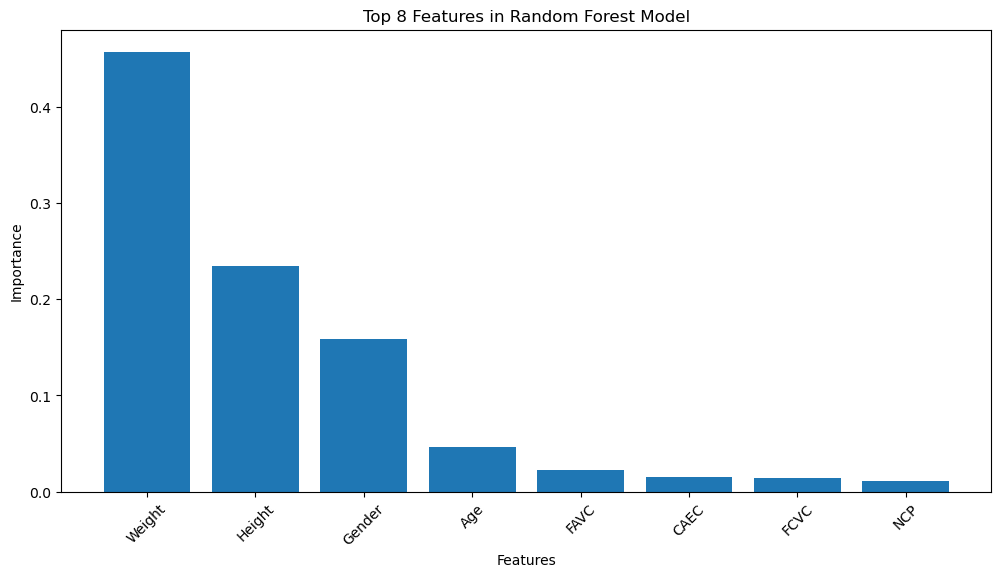

In [68]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_col['Feature'], sorted_col['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 8 Features in Random Forest Model')
plt.xticks(rotation=45)
plt.show()


In [82]:
removed_merge = merge_encoded.drop(columns=['Weight','Height','Age'])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(removed_merge, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7966903073286052
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.86      0.91      0.89        56
      Normal_Weight       0.63      0.71      0.67        62
     Obesity_Type_I       0.85      0.77      0.81        78
    Obesity_Type_II       0.79      0.93      0.86        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.71      0.61      0.65        56
Overweight_Level_II       0.70      0.62      0.66        50

           accuracy                           0.80       423
          macro avg       0.79      0.79      0.79       423
       weighted avg       0.80      0.80      0.79       423



In [85]:
feature_importance_df_2 = pd.DataFrame({
    "Feature": removed_merge.columns,
    "Importance": rf_model.feature_importances_
})
sorted_col_2 = feature_importance_df_2.sort_values('Importance', ascending=False).head(8)

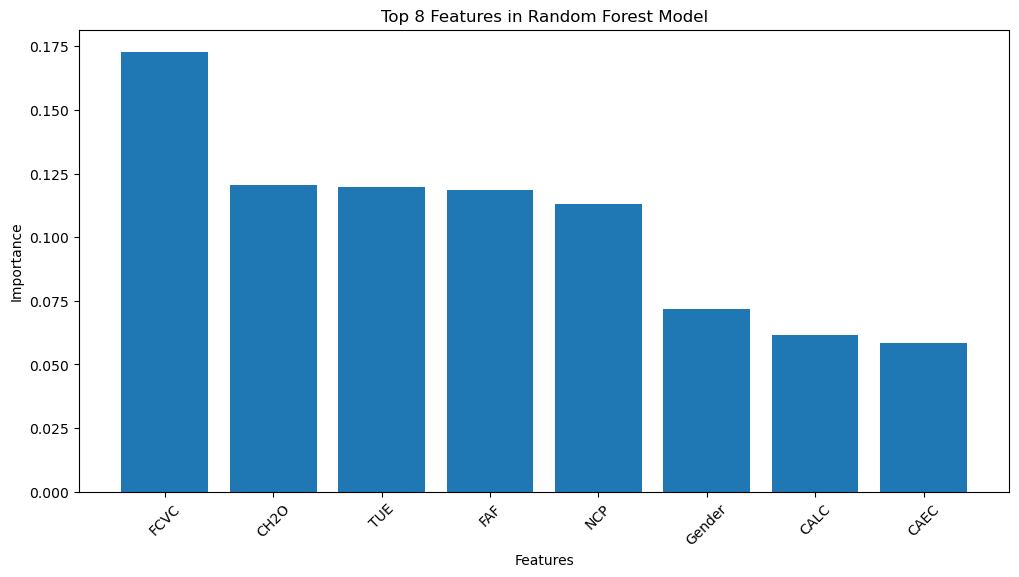

In [86]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_col_2['Feature'], sorted_col_2['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 8 Features in Random Forest Model')
plt.xticks(rotation=45)
plt.show()


In [87]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced upper limit for efficiency
    'max_depth': [10, 20, None],     # None allows fully grown trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with None
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,       # Use all available cores for faster execution
    verbose=2        # Increase verbosity for tracking progress
)

# Fit the model
grid_search.fit(X_train, y_train.values.ravel())

# Output best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt